In [1]:
import os
import csv
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import linregress
import scipy.stats as st
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#### Import and Cleanup of COVID Data (from The COVID Tracking Project)

In [3]:
# Step 1: Reference to csv data files
covid_path = "Data/COVID_Tracking_By_State_Thru_2020_10_09.csv"

In [4]:
# Step 2: Import csv files and create data frame, print headers to terminal
covid_df = pd.read_csv(covid_path)
covid_df.head()

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,10/9/2020,AK,A,60.0,60.0,0,NaN,NaN,NaN,51.0,...,493070.0,1899,NaN,NaN,NaN,NaN,NaN,0,493070.0,1899
1,10/9/2020,AL,A,2653.0,2496.0,16,157.0,17989.0,17989.0,816.0,...,1196452.0,11742,NaN,NaN,59957.0,NaN,NaN,0,1196452.0,11742
2,10/9/2020,AR,A+,1503.0,1359.0,0,144.0,5805.0,5805.0,546.0,...,1111526.0,0,NaN,21856.0,NaN,25538.0,NaN,0,1111526.0,0
3,10/9/2020,AS,D,0.0,NaN,0,NaN,NaN,NaN,NaN,...,1616.0,0,NaN,NaN,NaN,NaN,NaN,0,1616.0,0
4,10/9/2020,AZ,A+,5746.0,5460.0,3,286.0,20199.0,20199.0,706.0,...,1543445.0,12350,300333.0,NaN,NaN,NaN,1543445.0,12350,NaN,0


In [5]:
# Step 3: Reset data frame index and include only columns needed for merging and analysis
covid_df = covid_df[[
    'state','date','positive','totalTestResults']]
covid_df.head()

,state,date,positive,totalTestResults
0,AK,10/9/2020,10176.0,493070.0
1,AL,10/9/2020,163465.0,1196452.0
2,AR,10/9/2020,90145.0,1111526.0
3,AS,10/9/2020,0.0,1616.0
4,AZ,10/9/2020,224084.0,1543445.0


In [6]:
# Step 4: Split date by month, day and year
month = []
day = []
year = []

for column in covid_df["date"]:
    splitdate = column.split('/')
    month.append(splitdate[0])
    day.append(splitdate[1])
    year.append(splitdate[2])

covid_df["Month"] = month
covid_df["Day"] = day
covid_df["Year"] = year
covid_df.head()

,state,date,positive,totalTestResults,Month,Day,Year
0,AK,10/9/2020,10176.0,493070.0,10,9,2020
1,AL,10/9/2020,163465.0,1196452.0,10,9,2020
2,AR,10/9/2020,90145.0,1111526.0,10,9,2020
3,AS,10/9/2020,0.0,1616.0,10,9,2020
4,AZ,10/9/2020,224084.0,1543445.0,10,9,2020


In [7]:
# Step 5: Rename columns for readability
covid_df = covid_df.rename(columns={
    'state':'State',
    'positive':'Positive COVID Tests' ,
    'totalTestResults':'Total COVID Tests'
})
covid_df.head()

,State,date,Positive COVID Tests,Total COVID Tests,Month,Day,Year
0,AK,10/9/2020,10176.0,493070.0,10,9,2020
1,AL,10/9/2020,163465.0,1196452.0,10,9,2020
2,AR,10/9/2020,90145.0,1111526.0,10,9,2020
3,AS,10/9/2020,0.0,1616.0,10,9,2020
4,AZ,10/9/2020,224084.0,1543445.0,10,9,2020


In [8]:
# Step 6: Add calculations as new columns
covid_df["COVID Positivity Rate"] = ((covid_df["Positive COVID Tests"].fillna(.00000001) / covid_df["Total COVID Tests"].fillna(.000000001))*100)\
    .map(lambda x: x if x <= 100 else 0).round(2)
covid_df.head()

,State,date,Positive COVID Tests,Total COVID Tests,Month,Day,Year,COVID Positivity Rate
0,AK,10/9/2020,10176.0,493070.0,10,9,2020,2.06
1,AL,10/9/2020,163465.0,1196452.0,10,9,2020,13.66
2,AR,10/9/2020,90145.0,1111526.0,10,9,2020,8.11
3,AS,10/9/2020,0.0,1616.0,10,9,2020,0.00
4,AZ,10/9/2020,224084.0,1543445.0,10,9,2020,14.52


In [9]:
# Step 7: convert data frame columns by type (as needed)
# How to convert a Pandas DataFrame column from object to int in Python
# https://www.kite.com/python/answers/how-to-convert-a-pandas-dataframe-column-from-object-to-int-in-python
covid_df["Month"] = covid_df["Month"].astype(str).astype(int)
covid_df["Year"] = covid_df["Year"].astype(str).astype(int)
covid_df.head()

,State,date,Positive COVID Tests,Total COVID Tests,Month,Day,Year,COVID Positivity Rate
0,AK,10/9/2020,10176.0,493070.0,10,9,2020,2.06
1,AL,10/9/2020,163465.0,1196452.0,10,9,2020,13.66
2,AR,10/9/2020,90145.0,1111526.0,10,9,2020,8.11
3,AS,10/9/2020,0.0,1616.0,10,9,2020,0.00
4,AZ,10/9/2020,224084.0,1543445.0,10,9,2020,14.52


In [10]:
# Step 8: Replace values for Month (number) with names for readability
covid_df['Month'] = covid_df['Month'].replace({
    1:"01 Jan",
    2:"02 Feb",
    3:"03 Mar",
    4:"04 Apr",
    5:"05 May",
    6:"06 Jun",
    7:"07 Jul",
    8:"08 Aug",
    9:"09 Sep",
    10:"10 Oct",
    11:"11 Nov",
    12:"12 Dec"
})
covid_df.head()

,State,date,Positive COVID Tests,Total COVID Tests,Month,Day,Year,COVID Positivity Rate
0,AK,10/9/2020,10176.0,493070.0,10 Oct,9,2020,2.06
1,AL,10/9/2020,163465.0,1196452.0,10 Oct,9,2020,13.66
2,AR,10/9/2020,90145.0,1111526.0,10 Oct,9,2020,8.11
3,AS,10/9/2020,0.0,1616.0,10 Oct,9,2020,0.00
4,AZ,10/9/2020,224084.0,1543445.0,10 Oct,9,2020,14.52


In [11]:
# Step 9: Replace 'State' abbreviation with with names for readability
covid_df['State'] = covid_df['State'].replace({
    'AK':'Alaska','AR':'Arkansas','CO':'Colorado','CT':'Connecticut',
    'FL':'Florida','IL':'Illinois','KS':'Kansas','KY':'Kentucky',
    'LA':'Louisiana','MA':'Massachusetts','MO':'Missouri',
    'ND':'North Dakota','OR':'Oregon','TX':'Texas','VA':'Virginia',
    'WI':'Wisconsin','WA':'Washington','NJ':'New Jersey','MI':'Michigan',
    'RI':'Rhode Island','AZ':'Arizona','HI':'Hawaii','NC':'North Carolina',
    'CA':'California','GA':'Georgia','SC':'South Carolina','NY':'New York',
    'NH':'New Hampshire','MD':'Maryland','NV':'Nevada','TN':'Tennesee',
    'NE':'Nebraska','OH':'Ohio','DC':'District of Columbia','IA':'Iowa',
    'NM':'New Mexico','WV':'West Virginia','IN':'Indiana',
    'MS':'Mississippi','MN':'Minnesota','PA':'Pennsylvania','VT':'Vermont',
    'DE':'Delaware','MT':'Montana','AL':'Alabama','ME':'Maine',
    'WY':'Wyoming','UT':'Utah','ID':'Idaho','OK':'Oklahoma',
    'SD':'South Dakota','VI':'Virgin Islands','AS':'American Samoa',
    'GU':'Guam','MP':'Northern Mariana Islands','PR':'Puerto Rico'    
})
covid_df.head()

,State,date,Positive COVID Tests,Total COVID Tests,Month,Day,Year,COVID Positivity Rate
0,Alaska,10/9/2020,10176.0,493070.0,10 Oct,9,2020,2.06
1,Alabama,10/9/2020,163465.0,1196452.0,10 Oct,9,2020,13.66
2,Arkansas,10/9/2020,90145.0,1111526.0,10 Oct,9,2020,8.11
3,American Samoa,10/9/2020,0.0,1616.0,10 Oct,9,2020,0.00
4,Arizona,10/9/2020,224084.0,1543445.0,10 Oct,9,2020,14.52


In [12]:
# Step 10: Create a .csv file for the cleaned data frame
covid_df.to_csv(r'Data\cleaned_covid_data.csv', index=False)

_______________________

In [57]:
covid_df.head()

,State,date,Positive COVID Tests,Total COVID Tests,Month,Day,Year,COVID Positivity Rate
0,Alaska,10/9/2020,10176.0,493070.0,10 Oct,9,2020,2.06
1,Alabama,10/9/2020,163465.0,1196452.0,10 Oct,9,2020,13.66
2,Arkansas,10/9/2020,90145.0,1111526.0,10 Oct,9,2020,8.11
3,American Samoa,10/9/2020,0.0,1616.0,10 Oct,9,2020,0.00
4,Arizona,10/9/2020,224084.0,1543445.0,10 Oct,9,2020,14.52


In [58]:
import matplotlib.pyplot as plt

In [60]:
plot1_df = covid_df.groupby(['Year', 'Month']).agg({'COVID Positivity Rate': ['mean']})
plot1_df.columns = ['COVID Positivity Rate']
plot1_df.reset_index(inplace=True)
plot1_df["Year"].unique().tolist()
for y in plot1_df["Year"].unique().tolist():
    plot1_df[y] = plot1_df.loc[ plot1_df["Year"]== y ,'COVID Positivity Rate']

In [61]:
plot1 = plot1_df.copy(deep=True)
plot1 = plot1.drop(columns=["Year","COVID Positivity Rate"]).set_index("Month")
plot1 = pd.DataFrame({ col: plot1[col].dropna() for col in plot1.columns})
plot1 = plot1.apply (pd.to_numeric, errors='coerce')
plot1 = plot1.dropna()
plot1.head(12)

,2020
Month,
01 Jan,0.000000
02 Feb,0.529136
03 Mar,17.516820
04 Apr,12.667405
05 May,10.680161
06 Jun,7.070774
07 Jul,6.689597
08 Aug,6.826250
09 Sep,6.796315


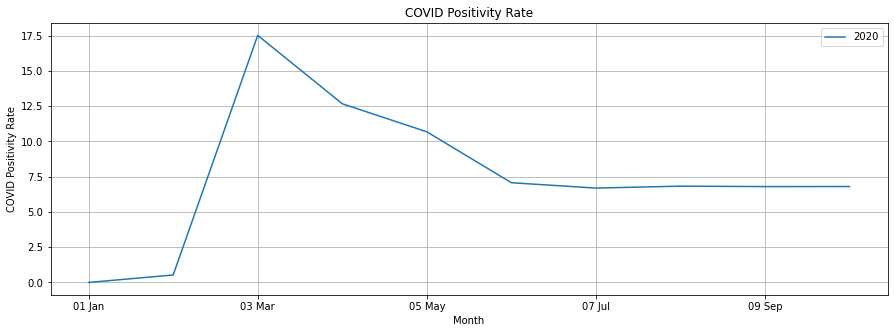

In [62]:
plot1.plot(figsize=(15,5))
plt.xlabel("Month")
plt.grid()
plt.ylabel("COVID Positivity Rate")
plt.title("COVID Positivity Rate")
plt.savefig("Images/covid1.png")